# Hierarchical Clustering: Dendrogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will use the same data than the previous notebook, so we can compare the results of the different clustering algorithms.  
Like last time, we generate 50 random 2-dimensionals datapoints, divide them into two groups and shift them in the opposite direction.

In [2]:
np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

We plot the data, and we can observe that it is the same datapoint distribution than last time, with two clear clusters.

Text(0, 0.5, 'X1')

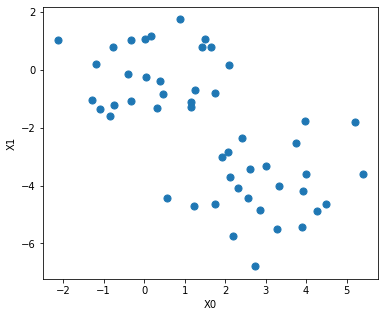

In [3]:
f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

Now we apply the *hierarchical clustering algorithm*.  
Opposed to kmeans, this algorithm is *deterministic*. That means it does not introduce any randomness (like the initialisation of the K-Means centroids), which means that even if you run it 1000 times, you will always have the same result.  
This is why there is no `random_state` when we create the model.

We are going to see two variants using sklearn (1) giving the number of final clusters in advanced (2) using a distance threshold to know when to stop. Later, we will see how to do that using the library scipy.

## Clustering by number of clusters

In [9]:
# importing the hierarchical algorithm function from sklearn
from sklearn.cluster import AgglomerativeClustering
# we create the hierarchical model
# As for K-Means, the hyperparameter n_cluster is the final number of clusters
# Here it is 2
# the parameter compute_distance is used because we want to plot a dendrogram later
hierarchical = AgglomerativeClustering(n_clusters=2, compute_distances=True) 
# We now use the function fit to put the data in two cluster
hierarchical.fit(X)

AgglomerativeClustering(compute_distances=True)

The model works the same way as K-Means. Once you fitted the data, you can observe the labels.

In [5]:
print(hierarchical.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Again, as K-Means, we did not supply any labels or information, only the datapoints themselves (it is an unsupervised learning problem).  

We can plot the data to observe the clustering into two groups the algorithm created. 


Text(0, 0.5, 'X1')

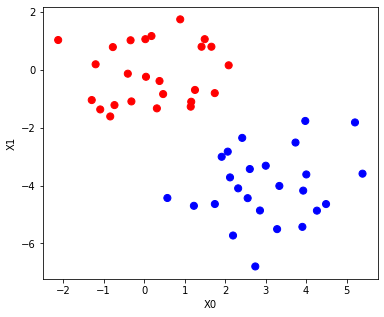

In [6]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = hierarchical.labels_, cmap = plt.cm.bwr) 
plt.xlabel('X0')
plt.ylabel('X1')

Here is a function taken from the sklearn website to represent dendrogram, as we have to create the linkage matrix ourselves. The linkage matrix is a matrix of distances between clusters. At each iteration, the algorithm update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters.

In [7]:
from scipy.cluster.hierarchy import dendrogram
# from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

We can now visualise the clusterisation we did with the hierarchical clustering by plotting a dendrogram. 
For that we call the previous function *plot_dendrogram*.

Text(0.5, 0, 'index of points')

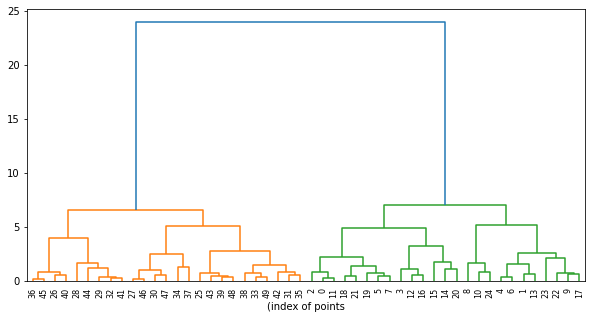

In [8]:
plt.figure(figsize=(10,5))
plot_dendrogram(hierarchical)
plt.xlabel("index of points")

We can also reduce the dendrogram in the case it is too complex, by choosing to display only a certain number of levels (starting from the highest cluster). In this case we only saw three levels.

Now the x-axis shows instead of single clusters, the number of datapoints that are grouped in this cluster. This ca be either a single node, or the number of nodes/points there is in the remaining branch (that we cutted)

Text(0.5, 0, '(Numbers of points in node) / index of points (with no parenthesis)')

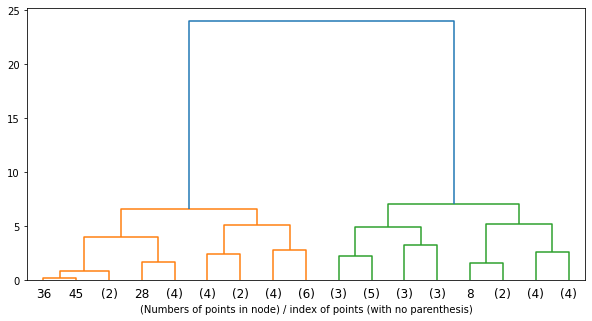

In [22]:
plt.figure(figsize=(10,5))
plot_dendrogram(hierarchical, truncate_mode='level', p=3)
plt.xlabel("(Numbers of points in node) / index of points (with no parenthesis)")

## Clustering by distance

Earlier we used the hierarchical cluster method by providing it with a number of predefined clusters. 

We can also prefer using a distance threshold to stop the aggregation process if this distance value is reached.  

In [102]:
# we create another hierarchical model
# We set that there is no predefined number of clusters
# and the threshold we use is 6
hierarchical_distance = AgglomerativeClustering(n_clusters=None, distance_threshold=6) 
# We now use the function fit to create the clusters 
hierarchical_distance.fit(X)

AgglomerativeClustering(distance_threshold=6, n_clusters=None)

Printing the labels, we can see that there are four different values, meaning that we have four clusters (label 0, 1, 2 and 3)

In [103]:
print(hierarchical_distance.labels_)

[2 0 2 2 0 2 0 2 0 0 0 2 2 0 2 2 2 0 2 2 2 2 0 0 0 1 3 1 3 3 1 1 3 1 1 1 3
 1 1 1 3 3 1 1 3 3 1 1 1 1]


Text(0, 0.5, 'X1')

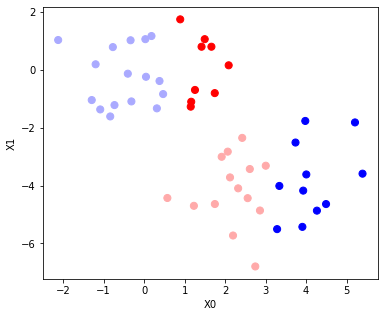

In [104]:
# we plot the model. We should expect four different colours
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = hierarchical_distance.labels_, cmap = plt.cm.bwr) 
plt.xlabel('X0')
plt.ylabel('X1')

As we can see there is a significant number of clusters, because we set the distance threshold to 6.

However, the dendrogram is still the same.

Text(0.5, 0, '(Numbers of points in node) / index of points (with no parenthesis)')

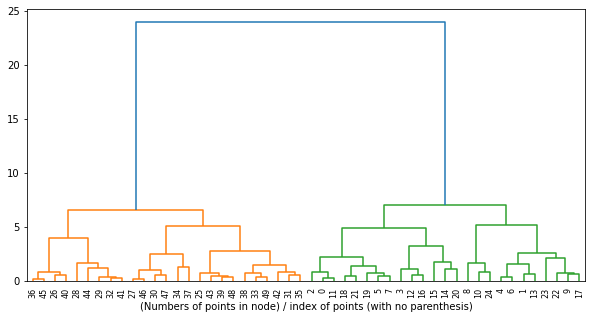

In [60]:
plt.figure(figsize=(10,5))
plot_dendrogram(hierarchical_distance, truncate_mode='level', p=7)
plt.xlabel("(Numbers of points in node) / index of points (with no parenthesis)")

## Using the dendrogram

Now we understand that the dendrogram is not linked to the clustering itself, but is only a representation based on the distance between datapoints.  

However, it helps us identify how many clusters would be created depending on a given distance threshold by taking a look to the y-axis, that displays the distance between clusters. 

Earlier, we used a `distance_threshold` of 6. If we read the dendrogram, we can observe that over 7 there is only two clusters. Close to 5, the branch splits into 4, and below that there are more and more splits. 

Then, because previously we used a threshold of 6, the merging into two groups did not happen, and this is why we finished with four clusters.

We can try to make now two clusters, with a threshold of 10, and a single cluster with a threshold of 30, so above 25.

In [83]:
# threshold of 10
h_10 = AgglomerativeClustering(n_clusters=None, distance_threshold=10) 
h_10.fit(X)

# threshold of 30
h_30 = AgglomerativeClustering(n_clusters=None, distance_threshold=30) 
h_30.fit(X)

AgglomerativeClustering(distance_threshold=30, n_clusters=None)

In [85]:
print(h_10.labels_)
print(h_30.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'threshold 30. No split, as 25 is smaller than 30')

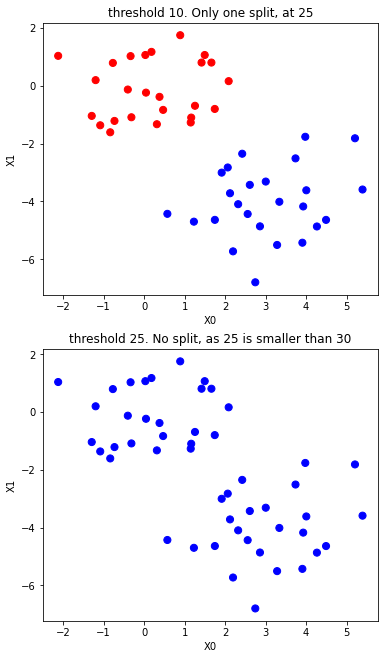

In [101]:
fig, axs = plt.subplots(2,1, figsize=(6,11))
axs[0].scatter(X[:,0], X[:,1], s = 50, c = h_10.labels_, cmap = plt.cm.bwr) 
axs[0].set_xlabel('X0')
axs[0].set_ylabel('X1')
axs[0].set_title('threshold 10. Only one split, at 25')
axs[1].scatter(X[:,0], X[:,1], s = 50, c = h_30.labels_, cmap = plt.cm.bwr) 
axs[1].set_xlabel('X0')
axs[1].set_ylabel('X1')
axs[1].set_title('threshold 30. No split, as 25 is smaller than 30')

## Using scipy

Scipy is another library that allows us to plot dendrograms without the necessity of calculating the linkage matrix. 
To use it, we first import these two methods for hierarchical clustering from scipy

In [105]:
# linkage is the function for hierarchical clustering in scipy
from scipy.cluster.hierarchy import linkage, dendrogram

we then we calculate the linkage matrix used to print the dendrograms.


In [119]:
result = linkage(X, 'ward')

and print the dendrogram giving the linkage matrix as a parameter. And that's all. As you can see this is a much easier way to plot dendrograms.

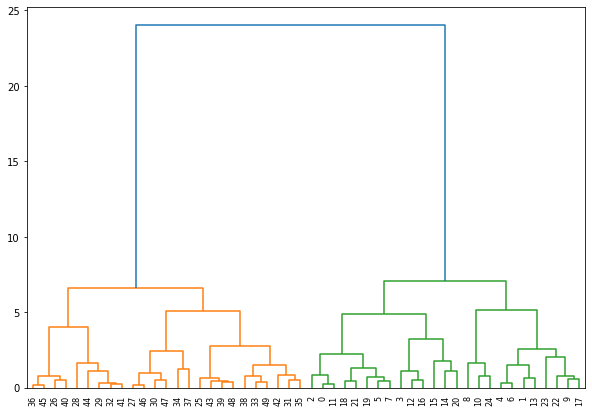

In [118]:
plt.figure(figsize=(10,7))
dendrogram(result)
plt.show()